Pen and Paper Answer: Undergrad Student

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving IMG_3898.jpeg to IMG_3898.jpeg


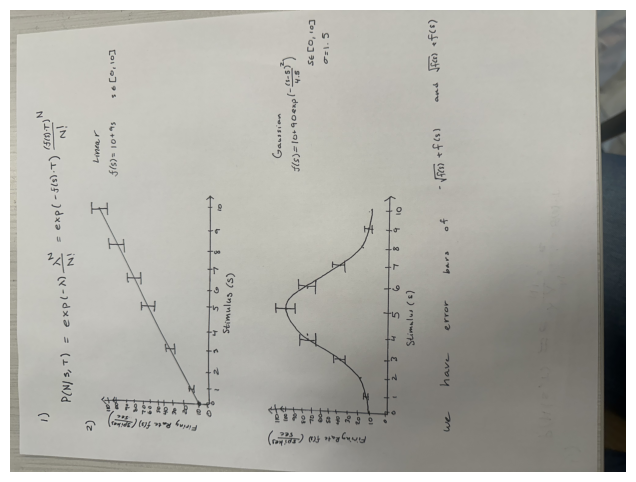

In [ ]:
import cv2
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open("IMG_3898.jpeg")  # replace with your uploaded filename
plt.figure(figsize=(8,6))  # adjust size as needed
plt.imshow(img)
plt.axis('off')
plt.show()


Simulation Questions:

1.) The probability that corresponds to a spike rate of around 10 spikes/second is $p=0.01$. During the first second the number of spikes varies from trial to trial but running multiple trails shows that the average of these tirals is usually around 10. This lets us introduce variability since the model is not determinisitc.

In [ ]:
import numpy as np

n = 100000
p = 0.01

bernoulli_vector = np.random.binomial(1, p, size=n)

print(f"Vector length: {len(bernoulli_vector)}")
print(f"Number of 1s: {np.sum(bernoulli_vector)}")
print(f"Spikes Per Second: {np.sum(bernoulli_vector)/(len(bernoulli_vector)*1e-3)}")

print(f"Number of 1s in First Second: {np.sum(bernoulli_vector[:int(1e3)])}")


Vector length: 100000
Number of 1s: 930
Spikes Per Second: 9.3
Number of 1s in First Second: 17


2.) The mean of the exponential distribution can be found by computing  $\int^\infty_0 x\lambda e^{-\lambda x} = \frac{1}{\lambda}$ and so our mean should be $\frac{1}{10}$ to acheive a spike rate of 10 spikes/second. Plugging this in validates the simulation. As the same as last time the amount of 1s in the first second is probabailistic but the values average around 10.



In [ ]:
import numpy as np

mean_isi = 0.1   # seconds
T = 100.0
spike_times = []
time = 0.0
while time < T:
    isi = np.random.exponential(mean_isi)
    time += isi
    spike_times.append(time)
spike_times = np.array(spike_times)

dt = 0.001
t = np.arange(0, T+dt, dt)
spike_train = np.zeros_like(t, dtype=int)
idx = np.round(spike_times / dt).astype(int)
idx = idx[idx < spike_train.size]
spike_train[idx] = 1

print(f"Vector length {len(spike_train)}")
print(f"Number of 1s: {np.sum(spike_train)}")
print(f"Spikes Per Second: {np.sum(spike_train)/(len(spike_train)*1e-3)}")

print(f"Number of 1s in First Second: {np.sum(spike_times <= 1.0)}")


Vector length 100001
Number of 1s: 1001
Spikes Per Second: 10.00989990100099
Number of 1s in First Second: 7


3.) From an ideal Poisson distribution we have a Fano factor of $\frac{\lambda}{\lambda}=1$. From our simulation we get similar Fano factors but not exactly 1 because of the probabilistic reality of the simulation. One thing to note is that the Fano factor is typically lower for the smaller chunks. This could be due to many reasons but one I could come up with was that of discretization. Essentially there a large amount of chunks with 0 or 1 spikes mean will be close to these bins and so the variance is a bit smaller. In one given tiral I obtained (listed in order of exponential 0.1, exponential 0.5, bernoulli 0.1, and bernouilli 0.5) Fano factors of 1.00, 1.06, 0.93, and 0.95.

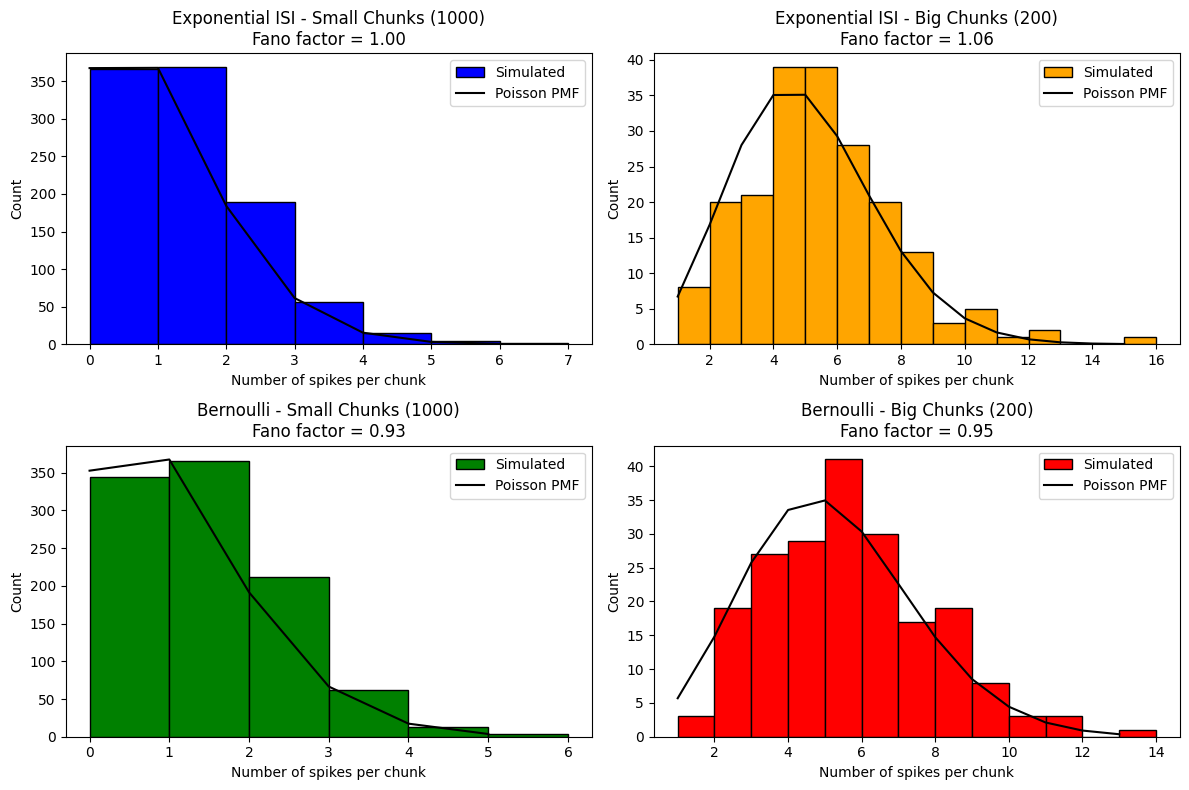

In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import poisson

exp_small_chunks = np.array_split(spike_train, 1000)
exp_big_chunks = np.array_split(spike_train, 200)
bern_small_chunks = np.array_split(bernoulli_vector, 1000)
bern_big_chunks = np.array_split(bernoulli_vector, 200)

exp_small_sums = [np.sum(chunk) for chunk in exp_small_chunks]
exp_big_sums   = [np.sum(chunk) for chunk in exp_big_chunks]
bern_small_sums = [np.sum(chunk) for chunk in bern_small_chunks]
bern_big_sums   = [np.sum(chunk) for chunk in bern_big_chunks]

exp_small_mean = np.mean(exp_small_sums)
exp_big_mean = np.mean(exp_big_sums)
bern_small_mean = np.mean(bern_small_sums)
bern_big_mean = np.mean(bern_big_sums)

exp_small_fano = np.var(exp_small_sums) / exp_small_mean
exp_big_fano = np.var(exp_big_sums) / exp_big_mean
bern_small_fano = np.var(bern_small_sums) / bern_small_mean
bern_big_fano = np.var(bern_big_sums) / bern_big_mean


fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Exponential Small
axs[0, 0].hist(exp_small_sums, bins=range(min(exp_small_sums), max(exp_small_sums)+2),
               color='blue', edgecolor='black', alpha=1, label='Simulated')
x = np.arange(min(exp_small_sums), max(exp_small_sums)+1)
axs[0, 0].plot(x, poisson.pmf(x, exp_small_mean) * len(exp_small_sums), 'black', label='Poisson PMF')
axs[0, 0].set_title(f'Exponential ISI - Small Chunks (1000)\nFano factor = {exp_small_fano:.2f}')
axs[0, 0].set_xlabel('Number of spikes per chunk')
axs[0, 0].set_ylabel('Count')
axs[0, 0].legend()

# Exponential Big
axs[0, 1].hist(exp_big_sums, bins=range(min(exp_big_sums), max(exp_big_sums)+2),
               color='orange', edgecolor='black', alpha=1, label='Simulated')
x = np.arange(min(exp_big_sums), max(exp_big_sums)+1)
axs[0, 1].plot(x, poisson.pmf(x, exp_big_mean) * len(exp_big_sums), 'black', label='Poisson PMF')
axs[0, 1].set_title(f'Exponential ISI - Big Chunks (200)\nFano factor = {exp_big_fano:.2f}')
axs[0, 1].set_xlabel('Number of spikes per chunk')
axs[0, 1].set_ylabel('Count')
axs[0, 1].legend()

# Bernoulli Small
axs[1, 0].hist(bern_small_sums, bins=range(min(bern_small_sums), max(bern_small_sums)+2),
               color='green', edgecolor='black', alpha=1, label='Simulated')
x = np.arange(min(bern_small_sums), max(bern_small_sums)+1)
axs[1, 0].plot(x, poisson.pmf(x, bern_small_mean) * len(bern_small_sums), 'black', label='Poisson PMF')
axs[1, 0].set_title(f'Bernoulli - Small Chunks (1000)\nFano factor = {bern_small_fano:.2f}')
axs[1, 0].set_xlabel('Number of spikes per chunk')
axs[1, 0].set_ylabel('Count')
axs[1, 0].legend()

# Bernoulli Big
axs[1, 1].hist(bern_big_sums, bins=range(min(bern_big_sums), max(bern_big_sums)+2),
               color='red', edgecolor='black', alpha=1, label='Simulated')
x = np.arange(min(bern_big_sums), max(bern_big_sums)+1)
axs[1, 1].plot(x, poisson.pmf(x, bern_big_mean) * len(bern_big_sums), 'black', label='Poisson PMF')
axs[1, 1].set_title(f'Bernoulli - Big Chunks (200)\nFano factor = {bern_big_fano:.2f}')
axs[1, 1].set_xlabel('Number of spikes per chunk')
axs[1, 1].set_ylabel('Count')
axs[1, 1].legend()

plt.tight_layout()
plt.show()


4a.)

When we represent spike trains as 0s and 1s we have easy implementation and reduction on computation. Analysis of different trials dependant on number of spikes is easy. There is alos a fixed size of the number of bins or time which simplifies implementation. Also algorithms which expect fixed dimension inputs can be used here. Additionally discrete time techniques and libraries can be used. On the other hand there is a limit in precision by the bin size, and the choice of the bin size can bias the results. Too many bins and your vector is too sparse and too few bins and you lose precision. The storage for this methods, especially on sparse spike trains is higher than other methods.


When we represent spike trains with spiking times we regain temporal information, thus allowing us to do more analyses that require precise timing. One thing I could imagine here would be correlations between different neurons more exactly such as interspike interval distributions. The storage is much simpler especially for sparse data. This method is more realistic to the actual data as well. Again there are some cons such as the irregularity of the structure of the data. There is a variable number of spikes per neuron/trial and this causes many issues in implemenation. This may also cause an increase in computational coinmplexity for analysis as well

4b.) I wasn't too sure what was wanted here for graphing and so I just graphed a few different things that made sense to me.

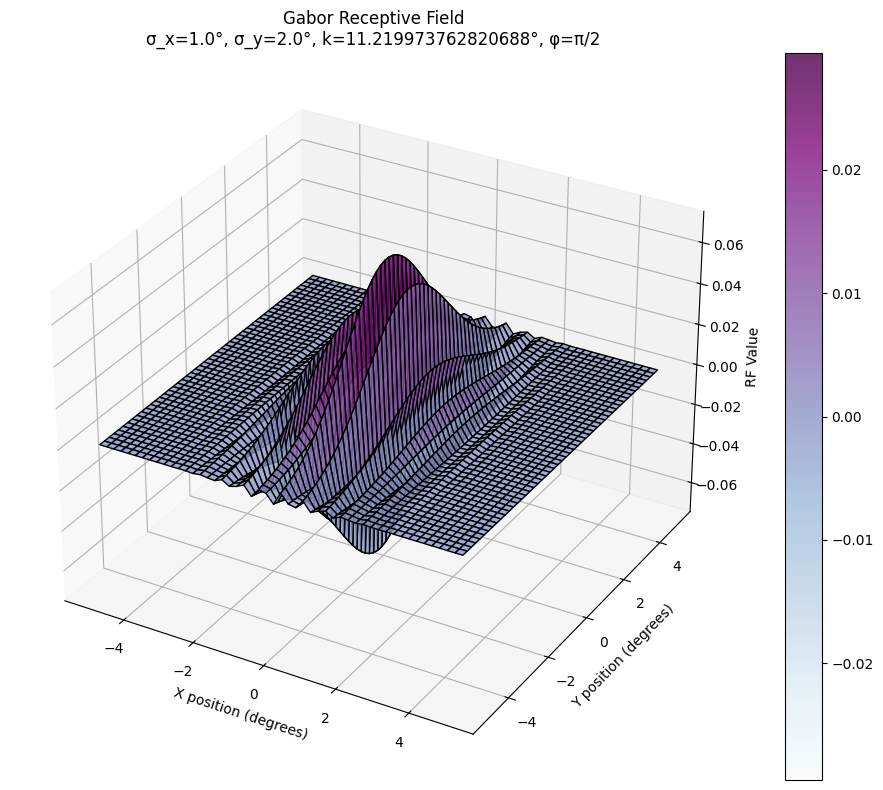

In [ ]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

def RF_calc(sigma_x, sigma_y, k, phi, x, y):
    exponent = - (x**2 / (2 * sigma_x**2)) - (y**2 / (2 * sigma_y**2))
    gaussian = np.exp(exponent)
    cosine = np.cos(k * x - phi)
    normalization = 1 / (2 * np.pi * sigma_x * sigma_y)
    return normalization * gaussian * cosine

# pmtrs
sigma_x = 1.0
sigma_y = 2.0
deg = 0.56
k = 2 * np.pi / deg
phi = np.pi / 2

x_range = np.linspace(-5, 5, 50)
y_range = np.linspace(-5, 5, 50)
x_grid, y_grid = np.meshgrid(x_range, y_range)

rf_values = RF_calc(sigma_x, sigma_y, k, phi, x_grid, y_grid)

# plot no sure what is wanted here
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

surface = ax.plot_surface(x_grid, y_grid, rf_values, cmap='BuPu',
                          edgecolor='black', alpha=0.8)

ax.set_xlabel('X position (degrees)')
ax.set_ylabel('Y position (degrees)')
ax.set_zlabel('RF Value')
ax.set_title('Gabor Receptive Field\n'
             f'σ_x={sigma_x}°, σ_y={sigma_y}°, k={k}°, φ=π/2')

fig.colorbar(surface, ax=ax, shrink=1, aspect=20)

plt.tight_layout()
plt.show()

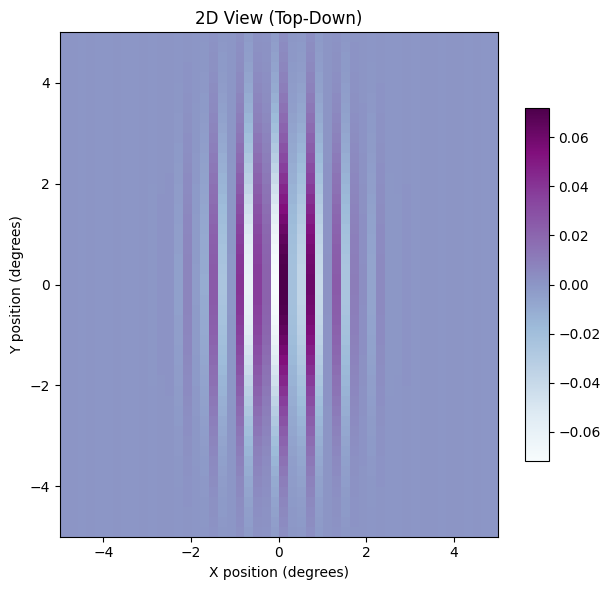

In [ ]:
fig = plt.figure(figsize=(12, 6))

ax2 = fig.add_subplot(122)
im = ax2.imshow(rf_values, extent=[-5, 5, -5, 5], origin='lower',
                cmap='BuPu', aspect='auto')
ax2.set_xlabel('X position (degrees)')
ax2.set_ylabel('Y position (degrees)')
ax2.set_title('2D View (Top-Down)')
fig.colorbar(im, ax=ax2, shrink=0.7, aspect=15)

plt.tight_layout()
plt.show()


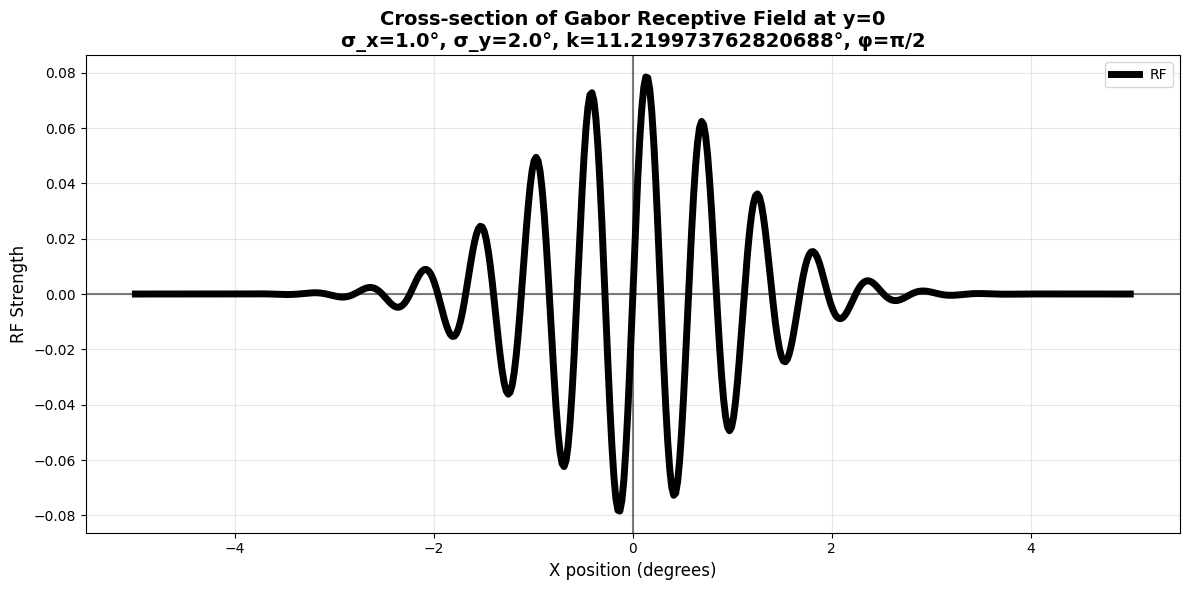

Maximum RF strength: 0.078435
Minimum RF strength: -0.078435
Number of 0s: 35


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x_values = np.linspace(-5, 5, 500)
y_zero = np.zeros_like(x_values)

rf_cross_section = RF_calc(sigma_x, sigma_y, k, phi, x_values, y_zero)

plt.figure(figsize=(12, 6))
plt.plot(x_values, rf_cross_section, 'black', linewidth=5, label='RF')

plt.xlabel('X position (degrees)', fontsize=12)
plt.ylabel('RF Strength', fontsize=12)
plt.title('Cross-section of Gabor Receptive Field at y=0\n'
          f'σ_x={sigma_x}°, σ_y={sigma_y}°, k={k}°, φ=π/2',
          fontsize=14, fontweight='bold')

plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='k', linestyle='-', alpha=0.5)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.5)

plt.legend()
plt.tight_layout()
plt.show()

print(f"Maximum RF strength: {np.max(rf_cross_section):.6f}")
print(f"Minimum RF strength: {np.min(rf_cross_section):.6f}")
print(f"Number of 0s: {np.sum(np.diff(np.sign(rf_cross_section)) != 0)}")

5.)

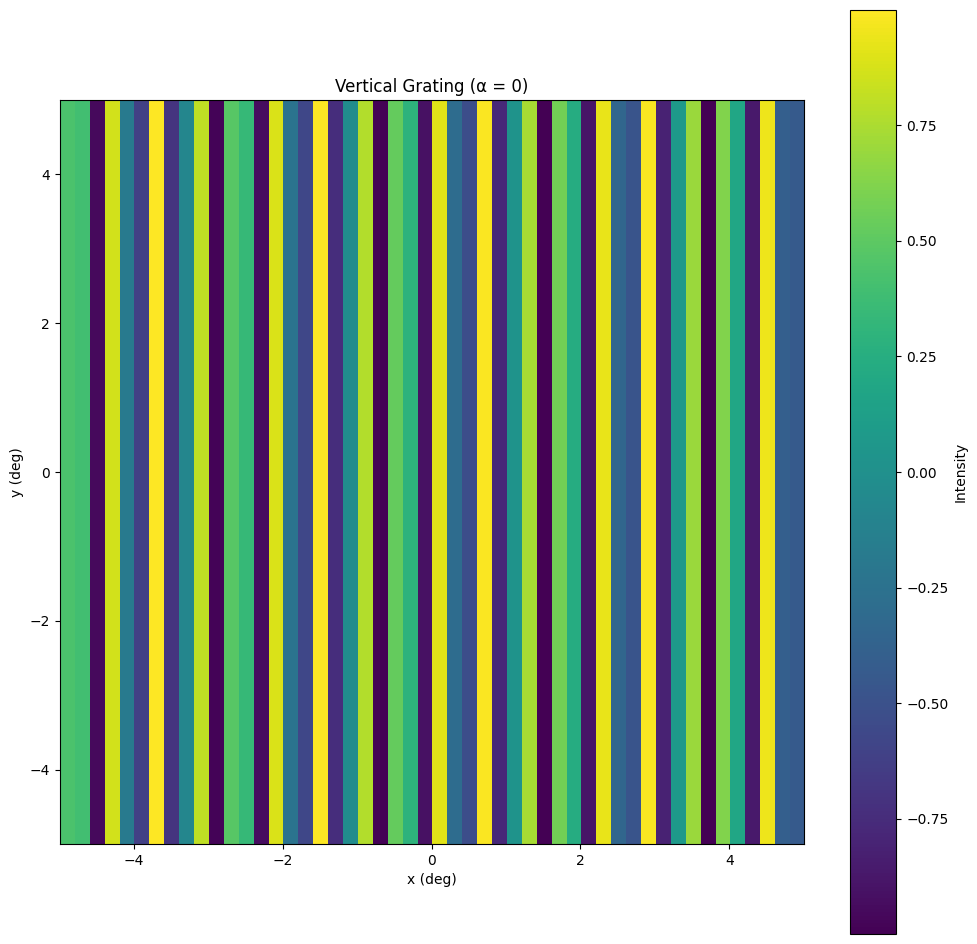

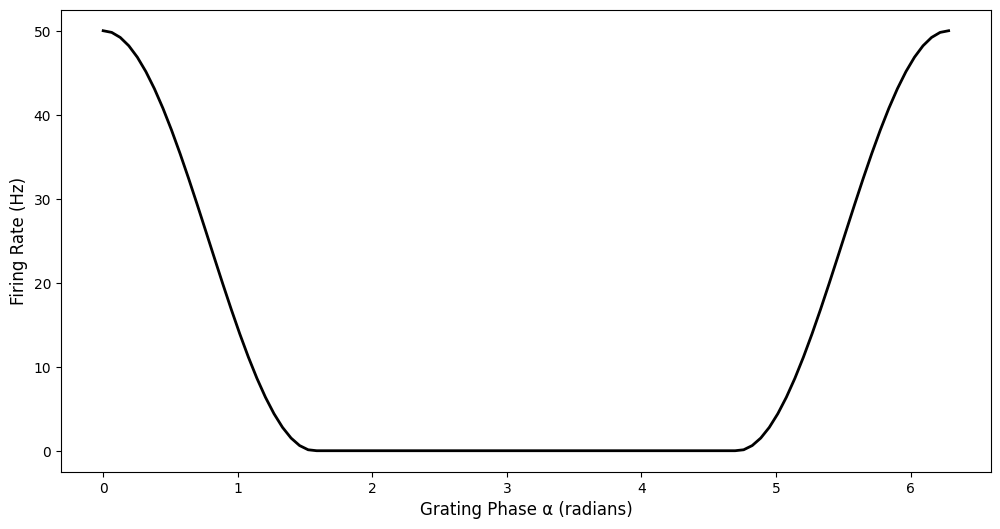

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x_range = np.linspace(-5, 5, 50)
y_range = np.linspace(-5, 5, 50)
x_grid, y_grid = np.meshgrid(x_range, y_range)

def gi_calc(k, alpha, x, y):
  return np.sin(k * x - alpha)

alpha = 0
vert_grating_alpha0 = gi_calc(k, alpha, x_grid, y_grid)

plt.figure(figsize=(12, 12))
plt.imshow(vert_grating_alpha0, cmap='viridis', extent=(-5, 5, -5, 5))
plt.colorbar(label='Intensity')
plt.xlabel('x (deg)')
plt.ylabel('y (deg)')
plt.title(f'Vertical Grating (α = {alpha})')
plt.show()

alpha_values = np.linspace(0, 2*np.pi, 100)
spike_rates = []

rf = RF_calc(sigma_x, sigma_y, k, phi, x_grid, y_grid).flatten()

for alpha in alpha_values:
  grating_alpha = gi_calc(k, alpha, x_grid, y_grid)
  grating_image = grating_alpha.flatten()
  product = np.dot(rf, grating_image)
  if product > 0:
    product = product ** 2
  else:
    product = 0
  spike_rates.append(product)

spike_rates = np.array(spike_rates)
spike_rates = spike_rates * 50 / np.max(spike_rates)


plt.figure(figsize=(12, 6))
plt.plot(alpha_values, spike_rates, 'black', linewidth=2)
plt.xlabel('Grating Phase α (radians)', fontsize=12)
plt.ylabel('Firing Rate (Hz)', fontsize=12)
plt.show()


6.)
The orientation tuning curve is periodic in 360 degrees rather than 180 degrees. At 180 degrees the value of the the firing rate is actually the negative of the firing rate at 0 or 360 degrees and this gets clipped to 0 since this is an infeasible value. Analytically we see that the value of the grating image when we add 180 degrees to the orientation. This is because the values of the trig functions flip due to trig idenities and thus the value is actually negative and so we we take the dot product every term is multiplied by negative one. For 360 degrees the grating image is identical and so we have the same function value and thus it is periodic in 360 degrees.

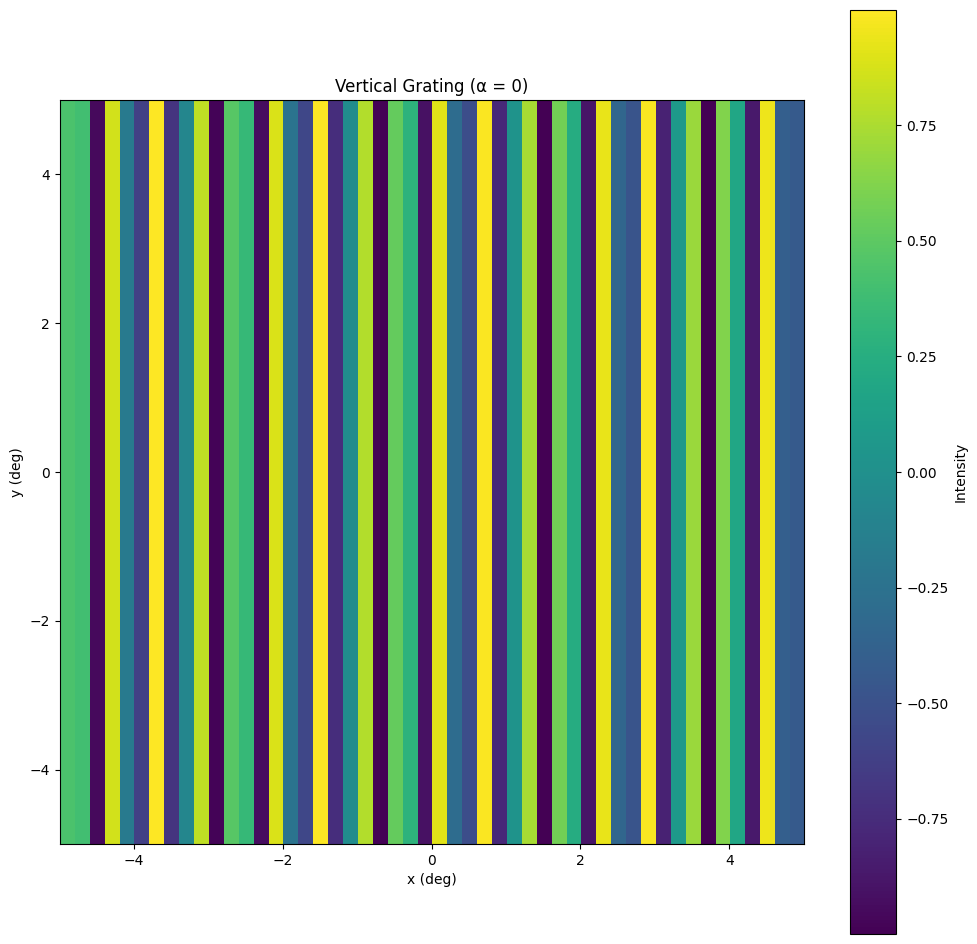

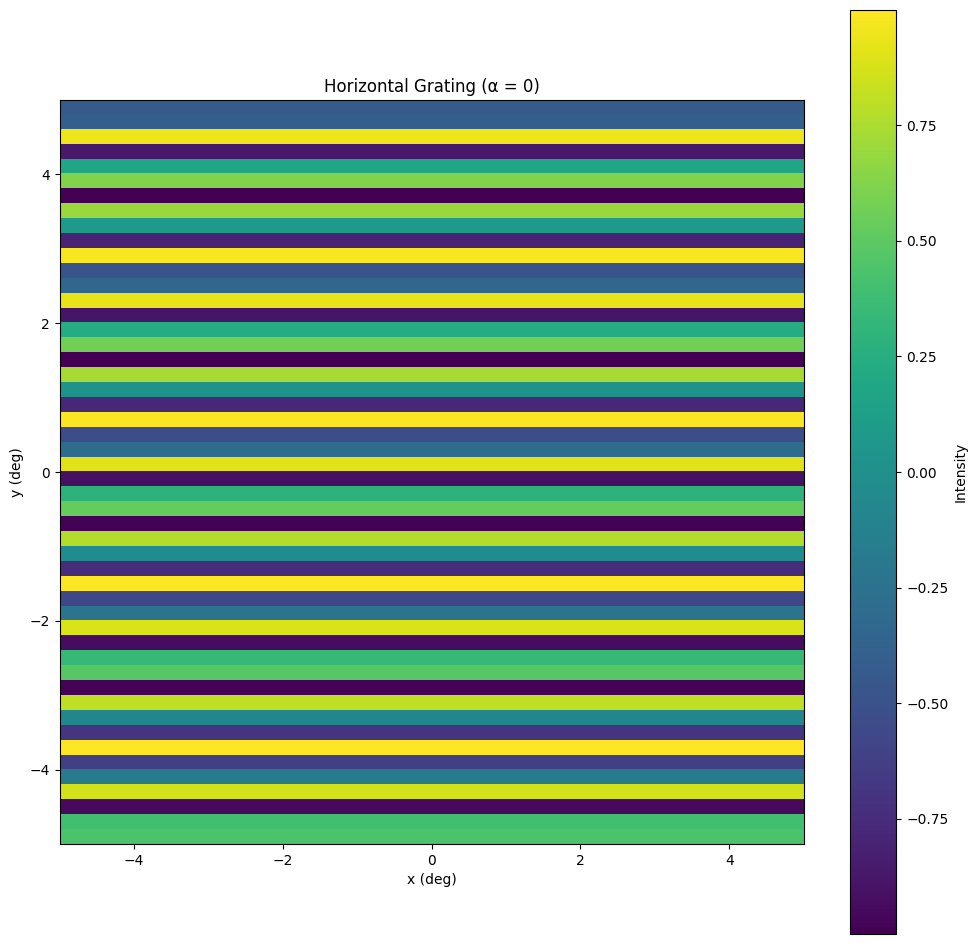

In [ ]:
x_range = np.linspace(-5, 5, 50)
y_range = np.linspace(-5, 5, 50)
x_grid, y_grid = np.meshgrid(x_range, y_range)

def gi_calc_oriented(k, alpha, x, y, orientation):
  value = np.sin(k*(x*np.cos(orientation)-y*np.sin(orientation)))
  return value

# Vertcial
alpha = 0
orientation = 0
grating_alpha0 = gi_calc_oriented(k, alpha, x_grid, y_grid, orientation)

plt.figure(figsize=(12, 12))
plt.imshow(grating_alpha0, cmap='viridis', extent=(-5, 5, -5, 5))
plt.colorbar(label='Intensity')
plt.xlabel('x (deg)')
plt.ylabel('y (deg)')
plt.title(f'Vertical Grating (α = {alpha})')
plt.show()

# Horizaontal
alpha = 0
orientation = np.pi/2
grating_alpha0 = gi_calc_oriented(k, alpha, x_grid, y_grid, orientation)

plt.figure(figsize=(12, 12))
plt.imshow(grating_alpha0, cmap='viridis', extent=(-5, 5, -5, 5))
plt.colorbar(label='Intensity')
plt.xlabel('x (deg)')
plt.ylabel('y (deg)')
plt.title(f'Horizontal Grating (α = {alpha})')
plt.show()

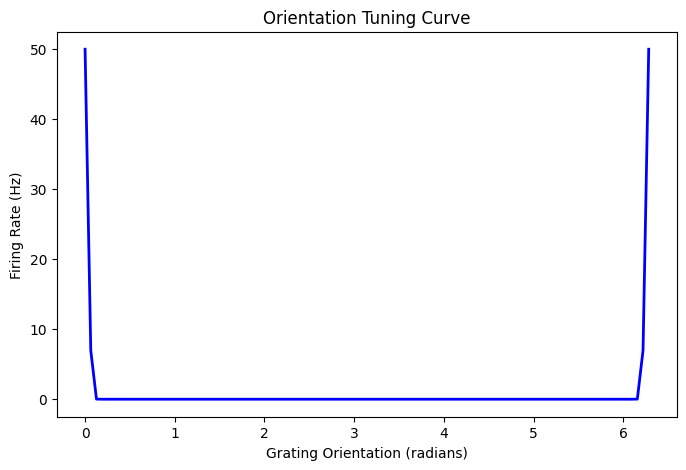

In [ ]:
orientation_values = np.linspace(0, 2*np.pi, 100)
spike_rates = []

rf = RF_calc(sigma_x, sigma_y, k, phi, x_grid, y_grid).flatten()

for orientation in orientation_values:
    grating = gi_calc_oriented(k, 0, x_grid, y_grid, orientation).flatten()
    product = np.dot(rf, grating)
    if product > 0:
      product = product ** 2
    else:
      product = 0
    spike_rates.append(product)

spike_rates = np.array(spike_rates)
spike_rates = 50 * spike_rates / spike_rates.max()

plt.figure(figsize=(8, 5))
plt.plot(orientation_values, spike_rates, 'b-', linewidth=2)
plt.xlabel('Grating Orientation (radians)')
plt.ylabel('Firing Rate (Hz)')
plt.title('Orientation Tuning Curve')
plt.show()


7.) The STA method for measuring the receptive field is effective, but you have to have enough compute power. The correlation coefficient approaches 1 as we increase the number of white noise images. For me I acheived a correlation of around 0.2 for 10 images, 0.6 for 1,000, 0.9 for 10,000, and 0.95 for 100,000 images. Looking at the 2d graph is more convincing than the 3d graph though.  

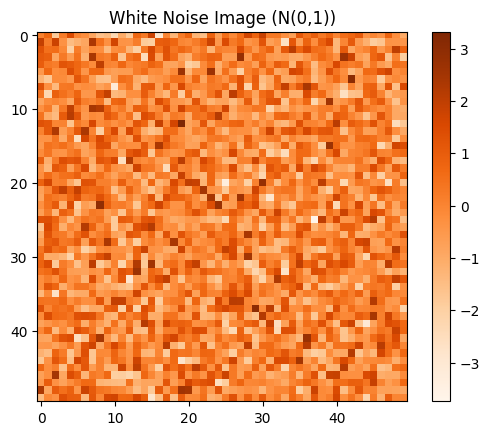

Average spike count: 0.1953


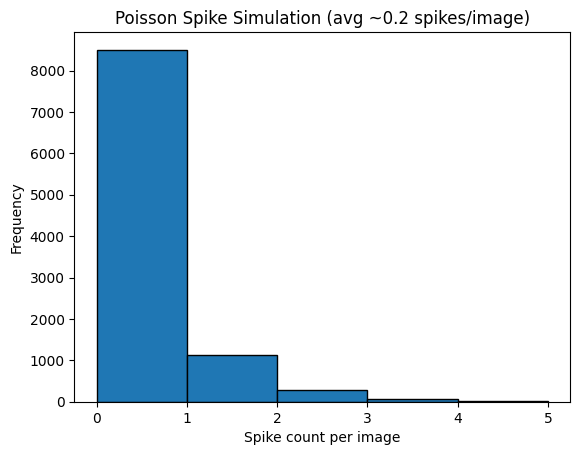

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
num_images = 10000
height = 50
width = 50

images = np.random.randn(num_images, height, width)


plt.imshow(images[0], cmap="Oranges")
plt.colorbar()
plt.title("White Noise Image (N(0,1))")
plt.show()


rf = RF_calc(sigma_x, sigma_y, k, phi, x_grid, y_grid).flatten()



responses = []
for i in range(num_images):
    img = images[i].flatten()
    r = np.dot(rf, img)
    r = max(0, r)
    responses.append(r)
responses = np.array(responses)
scale = 0.2 / np.mean(responses)
lambdas = responses * scale
spikes = np.random.poisson(lambdas)
print("Average spike count:", np.mean(spikes))

# ---- Plot distribution of spikes ----
plt.hist(spikes, bins=np.max(spikes)-np.min(spikes), edgecolor="black")
plt.xlabel("Spike count per image")
plt.ylabel("Frequency")
plt.title("Poisson Spike Simulation (avg ~0.2 spikes/image)")
plt.show()


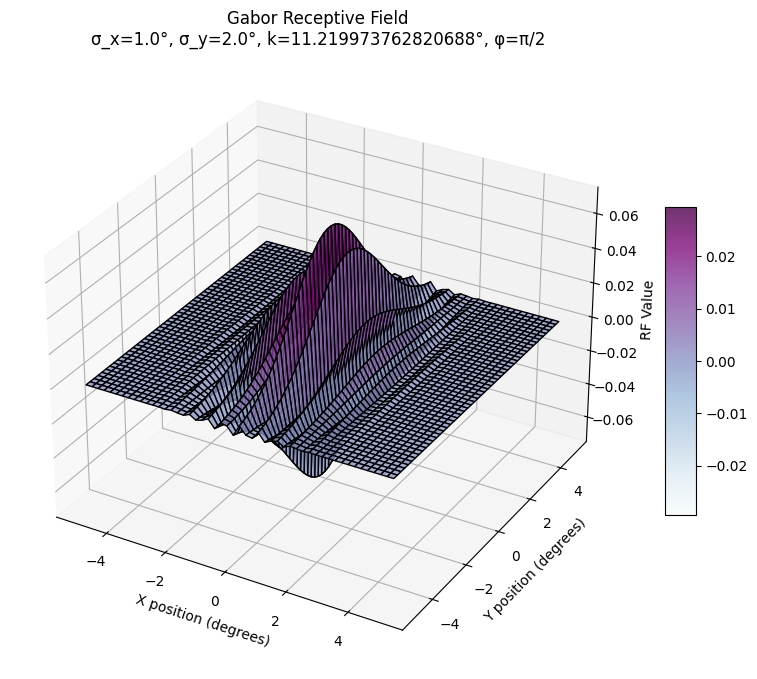

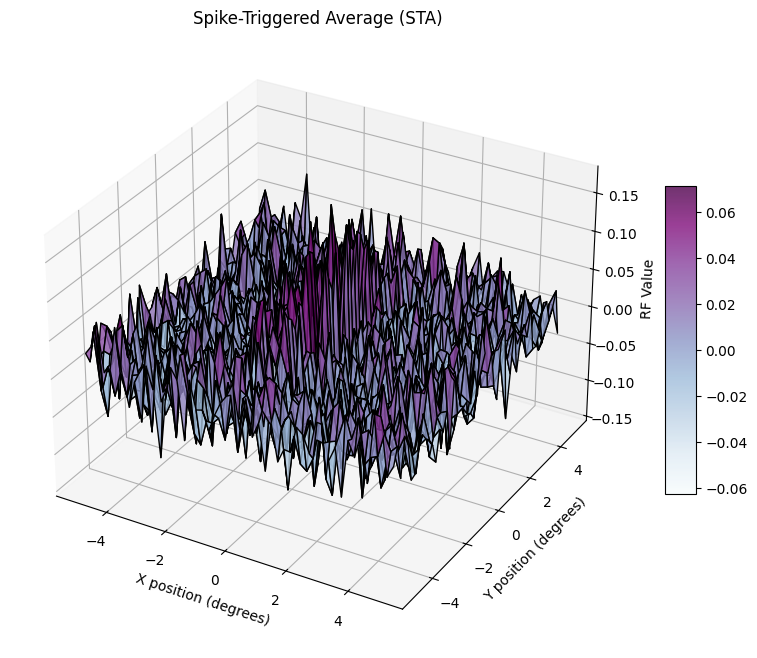

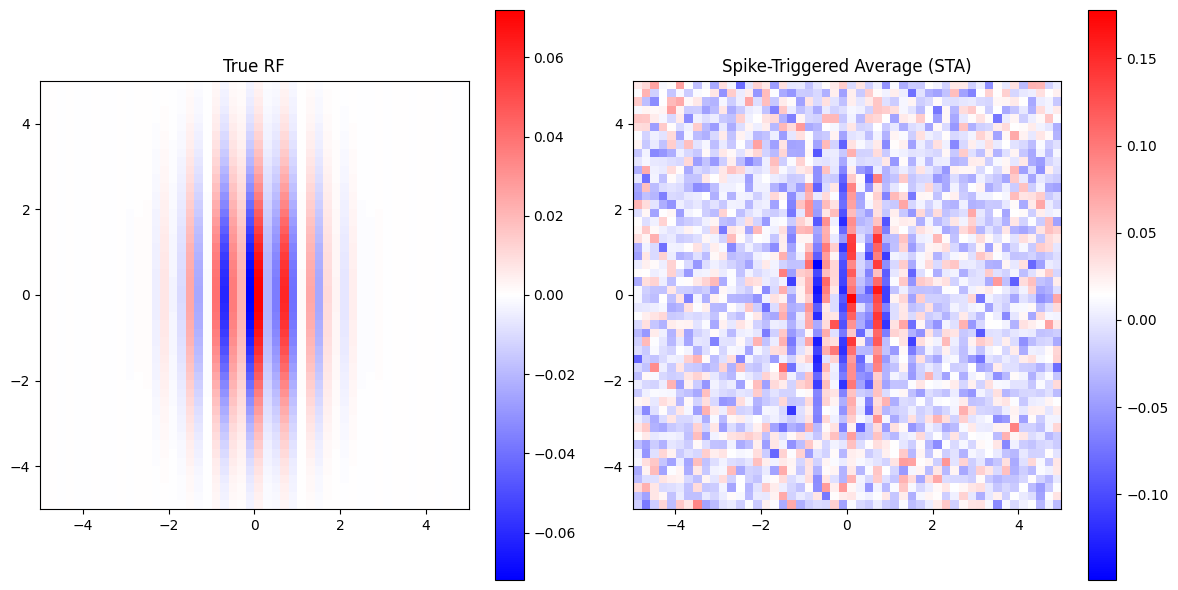

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x_range = np.linspace(-5, 5, 50)
y_range = np.linspace(-5, 5, 50)
x_grid, y_grid = np.meshgrid(x_range, y_range)

rf_values = RF_calc(sigma_x, sigma_y, k, phi, x_grid, y_grid)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
surface = ax.plot_surface(x_grid, y_grid, rf_values, cmap='BuPu', edgecolor='black', alpha=0.8)
ax.set_xlabel('X position (degrees)')
ax.set_ylabel('Y position (degrees)')
ax.set_zlabel('RF Value')
ax.set_title('Gabor Receptive Field\n'
             f'σ_x={sigma_x}°, σ_y={sigma_y}°, k={k}°, φ=π/2')
fig.colorbar(surface, ax=ax, shrink=0.5, aspect=10)
plt.show()

num_images = images.shape[0]
H, W = images.shape[1], images.shape[2]
flattened_images = images.reshape(num_images, H*W)

valid_mask = spikes > 0
valid_spikes = spikes[valid_mask]
valid_images_flat = flattened_images[valid_mask]

weighted_sum_flat = valid_spikes @ valid_images_flat
STA_flat = weighted_sum_flat / np.sum(valid_spikes)
STA = STA_flat.reshape(H, W)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
surface = ax.plot_surface(x_grid, y_grid, STA, cmap='BuPu', edgecolor='black', alpha=0.8)
ax.set_xlabel('X position (degrees)')
ax.set_ylabel('Y position (degrees)')
ax.set_zlabel('RF Value')
ax.set_title('Spike-Triggered Average (STA)')
fig.colorbar(surface, ax=ax, shrink=0.5, aspect=10)
plt.show()

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(rf_values, cmap="bwr", extent=[-5, 5, -5, 5])
plt.colorbar()
plt.title("True RF")

plt.subplot(1, 2, 2)
plt.imshow(STA, cmap="bwr", extent=[-5, 5, -5, 5])
plt.colorbar()
plt.title("Spike-Triggered Average (STA)")

plt.tight_layout()
plt.show()

rf_flat = rf_values.flatten()
sta_flat = STA.flatten()
corr = np.corrcoef(rf_flat, sta_flat)[0, 1]


In [ ]:
print("Correlation between RF and STA:", corr)

Correlation between RF and STA: 0.6617778842970196


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
num_images = 100000
height = 50
width = 50

images = np.random.randn(num_images, height, width)

rf = RF_calc(sigma_x, sigma_y, k, phi, x_grid, y_grid).flatten()

responses = []
for i in range(num_images):
    img = images[i].flatten()
    r = np.dot(rf, img)
    r = max(0, r)
    responses.append(r)
responses = np.array(responses)
scale = 0.2 / np.mean(responses)
lambdas = responses * scale
spikes = np.random.poisson(lambdas)



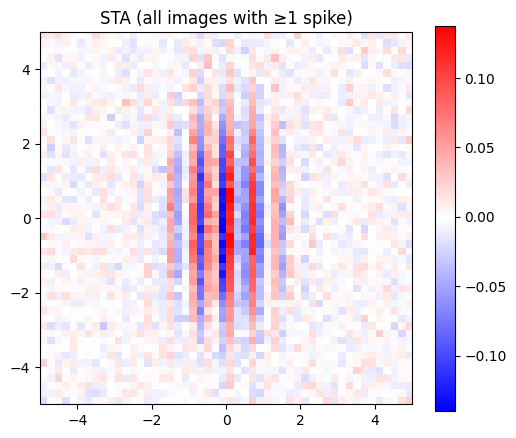

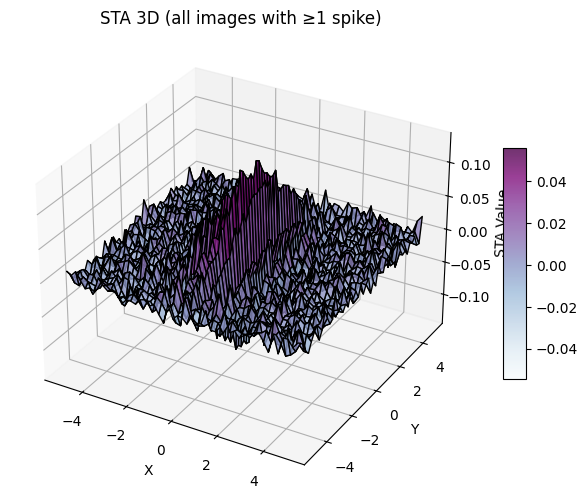

Correlation between STA and True RF (all valid spikes): 0.9402


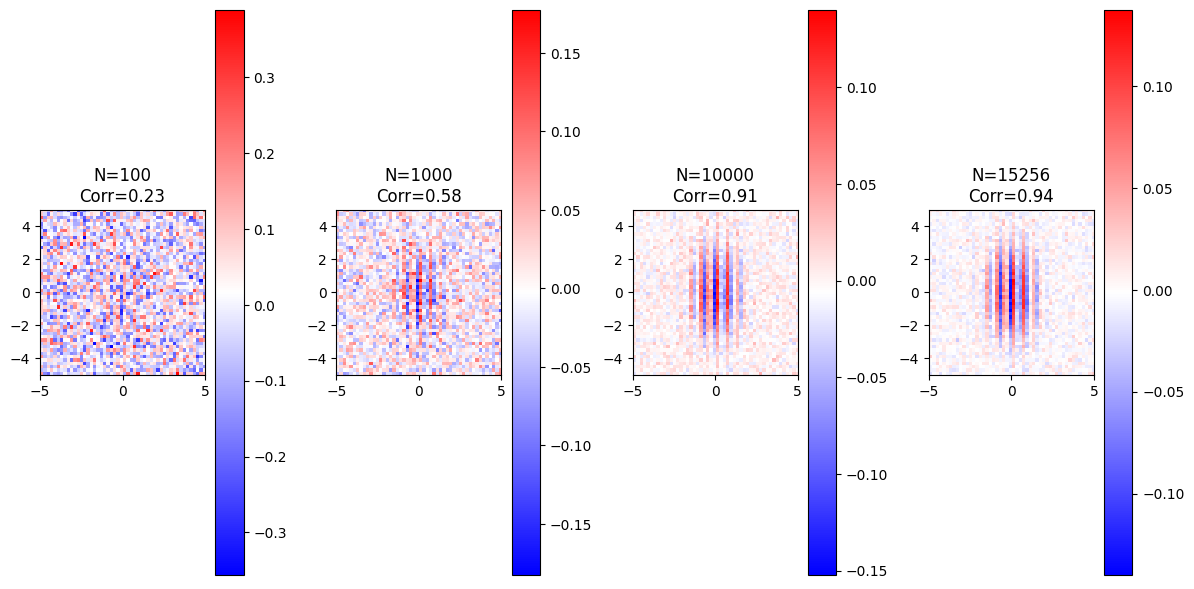

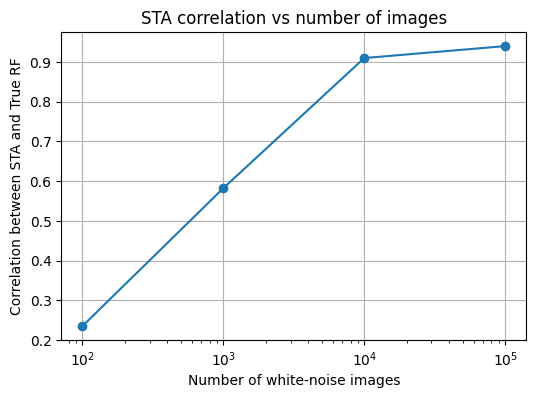

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

rf_values = RF_calc(sigma_x, sigma_y, k, phi, x_grid, y_grid)
H, W = rf_values.shape

num_images = images.shape[0]
flattened_images = images.reshape(num_images, H*W)

valid_mask = spikes > 0
valid_images_flat = flattened_images[valid_mask]
valid_spikes = spikes[valid_mask]

STA_flat = valid_spikes @ valid_images_flat / np.sum(valid_spikes)
STA = STA_flat.reshape(H, W)

plt.figure(figsize=(6,5))
plt.imshow(STA, cmap='bwr', extent=[-5,5,-5,5])
plt.colorbar()
plt.title("STA (all images with ≥1 spike)")
plt.show()

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
surface = ax.plot_surface(x_grid, y_grid, STA, cmap='BuPu', edgecolor='black', alpha=0.8)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('STA Value')
ax.set_title("STA 3D (all images with ≥1 spike)")
fig.colorbar(surface, ax=ax, shrink=0.5, aspect=10)
plt.show()

rf_flat = rf_values.flatten()
sta_flat = STA.flatten()
corr_all = np.corrcoef(rf_flat, sta_flat)[0, 1]
print(f"Correlation between STA and True RF (all valid spikes): {corr_all:.4f}")

sample_sizes = [100, 1000, 10000, 100000]
correlations = []

plt.figure(figsize=(12,6))
for i, N in enumerate(sample_sizes):
    N_subset = min(N, len(valid_spikes))
    sampled_spikes = valid_spikes[:N_subset]
    sampled_images_flat = valid_images_flat[:N_subset]

    STA_flat = sampled_spikes @ sampled_images_flat / np.sum(sampled_spikes)
    STA_subset = STA_flat.reshape(H, W)

    corr = np.corrcoef(rf_flat, STA_flat)[0, 1]
    correlations.append(corr)

    plt.subplot(1, len(sample_sizes), i+1)
    plt.imshow(STA_subset, cmap='bwr', extent=[-5,5,-5,5])
    plt.colorbar()
    plt.title(f"N={N_subset}\nCorr={corr:.2f}")

plt.tight_layout()
plt.show()

plt.figure(figsize=(6,4))
plt.plot(sample_sizes, correlations, marker='o')
plt.xscale('log')
plt.xlabel("Number of white-noise images")
plt.ylabel("Correlation between STA and True RF")
plt.title("STA correlation vs number of images")
plt.grid(True)
plt.show()
